In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vitamin-deficiency-disease-prediction-dataset/vitamin_deficiency_disease_dataset_20260123.csv


In [2]:


path = "/kaggle/input/vitamin-deficiency-disease-prediction-dataset/vitamin_deficiency_disease_dataset_20260123.csv"

df = pd.read_csv(path)

df.head()


,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,...,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,Male,24.8,Former,NaN,Active,Vegetarian,High,High,Mid,...,0,0,0,0,0,0,0,0,Healthy,0
1,77,Female,39.9,Former,Moderate,Light,Omnivore,Low,Low,Low,...,0,0,0,1,0,0,0,0,Rickets_Osteomalacia,0
2,24,Male,26.4,Former,Heavy,Moderate,Omnivore,Low,High,High,...,1,0,0,0,0,0,0,0,Healthy,0
3,69,Male,23.1,Never,Heavy,Moderate,Vegetarian,High,Low,Low,...,0,0,0,0,0,1,1,0,Anemia,0
4,63,Male,29.6,Never,NaN,Moderate,Vegetarian,Moderate,High,Low,...,0,0,0,0,0,0,0,0,Healthy,0


In [3]:
df['disease_diagnosis'].value_counts()

disease_diagnosis
Healthy                 1509
Anemia                  1245
Rickets_Osteomalacia    1029
Night_Blindness          122
Scurvy                    95
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4000 non-null   int64  
 1   gender                     4000 non-null   object 
 2   bmi                        4000 non-null   float64
 3   smoking_status             4000 non-null   object 
 4   alcohol_consumption        2722 non-null   object 
 5   exercise_level             4000 non-null   object 
 6   diet_type                  4000 non-null   object 
 7   sun_exposure               4000 non-null   object 
 8   income_level               4000 non-null   object 
 9   latitude_region            4000 non-null   object 
 10  vitamin_a_percent_rda      4000 non-null   float64
 11  vitamin_c_percent_rda      4000 non-null   float64
 12  vitamin_d_percent_rda      4000 non-null   float64
 13  vitamin_e_percent_rda      4000 non-null   float

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4000.0,50.766250,19.306237,18.0,34.000,51.00,67.0000,84.0
bmi,4000.0,26.105325,4.922746,15.0,22.800,26.20,29.4000,45.0
vitamin_a_percent_rda,4000.0,90.770850,37.083534,10.0,62.600,85.50,115.3000,219.0
vitamin_c_percent_rda,4000.0,89.199075,37.505809,10.0,60.975,83.50,113.0000,250.0
vitamin_d_percent_rda,4000.0,72.216388,42.831000,7.0,40.730,62.27,93.3175,275.6
vitamin_e_percent_rda,4000.0,89.946125,37.444649,10.0,61.700,84.05,114.1000,237.6
vitamin_b12_percent_rda,4000.0,62.743225,37.396636,10.0,32.700,55.60,84.5000,243.6
folate_percent_rda,4000.0,90.382275,37.563684,10.0,61.800,84.80,115.2000,226.6
calcium_percent_rda,4000.0,82.586300,36.359131,10.0,55.600,77.10,105.3000,232.7
iron_percent_rda,4000.0,76.211125,33.226984,10.0,51.400,71.25,95.9000,211.4


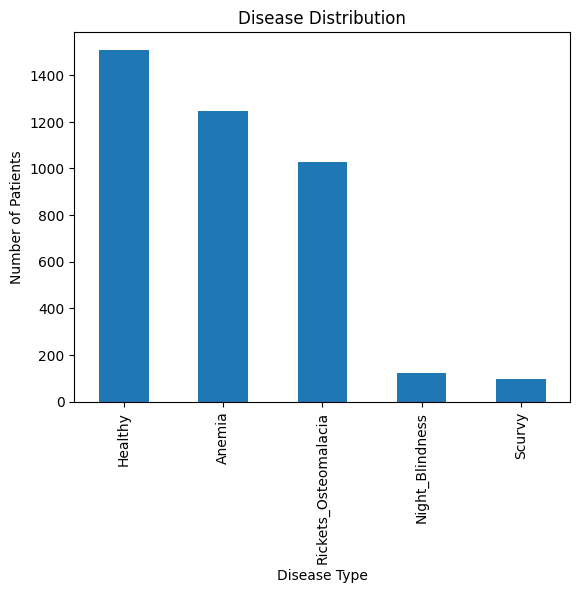

In [6]:
import matplotlib.pyplot as plt

df['disease_diagnosis'].value_counts().plot(kind='bar')

plt.title("Disease Distribution")
plt.xlabel("Disease Type")
plt.ylabel("Number of Patients")

plt.show()

In [7]:
df.isnull().sum()

age                             0
gender                          0
bmi                             0
smoking_status                  0
alcohol_consumption          1278
exercise_level                  0
diet_type                       0
sun_exposure                    0
income_level                    0
latitude_region                 0
vitamin_a_percent_rda           0
vitamin_c_percent_rda           0
vitamin_d_percent_rda           0
vitamin_e_percent_rda           0
vitamin_b12_percent_rda         0
folate_percent_rda              0
calcium_percent_rda             0
iron_percent_rda                0
hemoglobin_g_dl                 0
serum_vitamin_d_ng_ml           0
serum_vitamin_b12_pg_ml         0
serum_folate_ng_ml              0
symptoms_count                  0
symptoms_list                1328
has_night_blindness             0
has_fatigue                     0
has_bleeding_gums               0
has_bone_pain                   0
has_muscle_weakness             0
has_numbness_t

In [8]:
df['alcohol_consumption'] = df['alcohol_consumption'].fillna("Unknown")
df['alcohol_consumption']

0        Unknown
1       Moderate
2          Heavy
3          Heavy
4        Unknown
          ...   
3995       Heavy
3996    Moderate
3997     Unknown
3998       Heavy
3999     Unknown
Name: alcohol_consumption, Length: 4000, dtype: object

In [9]:

df.drop(columns=['symptoms_list'], inplace=True)

In [10]:
df.select_dtypes(include='object').columns

Index(['gender', 'smoking_status', 'alcohol_consumption', 'exercise_level',
       'diet_type', 'sun_exposure', 'income_level', 'latitude_region',
       'disease_diagnosis'],
      dtype='object')

In [11]:
# Gender
df['gender'] = df['gender'].map({
    'Male': 0,
    'Female': 1
})

# Smoking status
df['smoking_status'] = df['smoking_status'].map({
    'Never': 0,
    'Former': 1,
    'Current': 2
})

# Alcohol consumption
df['alcohol_consumption'] = df['alcohol_consumption'].map({
    'Unknown': 0,
    'Moderate': 1,
    'Heavy': 2
})

# Exercise level
df['exercise_level'] = df['exercise_level'].map({
    'Sedentary': 0,
    'Light': 1,
    'Moderate': 2,
    'Active': 3
})

# Diet type
df['diet_type'] = df['diet_type'].map({
    'Omnivore': 0,
    'Vegetarian': 1,
    'Pescatarian': 2,
    'Vegan': 3
})

# Sun exposure
df['sun_exposure'] = df['sun_exposure'].map({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})

# Income level
df['income_level'] = df['income_level'].map({
    'Low': 0,
    'Middle': 1,
    'High': 2
})

# Latitude region 
df["latitude_region"] = df["latitude_region"].map({
    "Low": 0,
    "Mid": 1,
    "High": 2
})


# Hedef değişken
df['disease_diagnosis'] = df['disease_diagnosis'].map({
    'Healthy': 0,
    'Anemia': 1,
    'Night_Blindness': 2,
    'Rickets_Osteomalacia': 3,
    'Scurvy': 4
})


In [12]:
df.head()

,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,...,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,0,24.8,1,0,3,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
1,77,1,39.9,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,3,0
2,24,0,26.4,1,2,2,0,0,2,2,...,1,0,0,0,0,0,0,0,0,0
3,69,0,23.1,0,2,2,1,2,0,0,...,0,0,0,0,0,1,1,0,1,0
4,63,0,29.6,0,0,2,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.isna().sum()


age                          0
gender                       0
bmi                          0
smoking_status               0
alcohol_consumption          0
exercise_level               0
diet_type                    0
sun_exposure                 0
income_level                 0
latitude_region              0
vitamin_a_percent_rda        0
vitamin_c_percent_rda        0
vitamin_d_percent_rda        0
vitamin_e_percent_rda        0
vitamin_b12_percent_rda      0
folate_percent_rda           0
calcium_percent_rda          0
iron_percent_rda             0
hemoglobin_g_dl              0
serum_vitamin_d_ng_ml        0
serum_vitamin_b12_pg_ml      0
serum_folate_ng_ml           0
symptoms_count               0
has_night_blindness          0
has_fatigue                  0
has_bleeding_gums            0
has_bone_pain                0
has_muscle_weakness          0
has_numbness_tingling        0
has_memory_problems          0
has_pale_skin                0
disease_diagnosis            0
has_mult

In [14]:
df.to_csv("/kaggle/working/clean_dataset.csv", index=False)

Which vitamin has the biggest effect on fatigue?

In [15]:
y = df["has_fatigue"]
y

0       0
1       0
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    1
3998    0
3999    0
Name: has_fatigue, Length: 4000, dtype: int64

In [16]:
X = df.drop(
    ["has_fatigue", "disease_diagnosis", "symptoms_count"],
    axis=1
)
X

,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,...,serum_vitamin_b12_pg_ml,serum_folate_ng_ml,has_night_blindness,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,has_multiple_deficiencies
0,79,0,24.8,1,0,3,1,2,2,1,...,356.4,23.3,0,0,0,0,0,0,0,0
1,77,1,39.9,1,1,1,0,0,0,0,...,303.0,5.3,0,0,1,0,0,0,0,0
2,24,0,26.4,1,2,2,0,0,2,2,...,578.0,16.3,1,0,0,0,0,0,0,0
3,69,0,23.1,0,2,2,1,2,0,0,...,144.8,9.2,0,0,0,0,1,1,0,0
4,63,0,29.6,0,0,2,1,1,2,0,...,348.2,13.4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,25,1,21.6,1,2,3,2,1,1,2,...,346.7,9.2,1,0,0,0,0,0,0,0
3996,50,0,29.5,1,1,0,1,0,2,0,...,272.2,15.0,0,0,0,0,0,0,0,0
3997,34,1,24.8,0,0,3,2,1,0,0,...,100.0,4.8,0,0,0,0,1,1,0,0
3998,39,1,26.9,1,2,3,0,2,0,2,...,138.8,6.1,1,0,0,0,0,0,0,0


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.9375

In [21]:
importance = model.feature_importances_

import pandas as pd

fatigue_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": importance
}).sort_values(by="importance", ascending=False)

fatigue_importance.head(10)


,feature,importance
17,iron_percent_rda,0.246250
15,folate_percent_rda,0.123082
28,has_pale_skin,0.113141
11,vitamin_c_percent_rda,0.078162
21,serum_folate_ng_ml,0.061347
8,income_level,0.051329
16,calcium_percent_rda,0.033080
13,vitamin_e_percent_rda,0.029699
10,vitamin_a_percent_rda,0.028753
14,vitamin_b12_percent_rda,0.025254


In [22]:
symptom_cols = [
    "symptoms_count",
    "has_night_blindness",
    "has_fatigue",
    "has_bleeding_gums",
    "has_bone_pain",
    "has_muscle_weakness",
    "has_numbness_tingling",
    "has_memory_problems",
    "has_pale_skin",
    "has_multiple_deficiencies"
]
blood_cols = [
    "hemoglobin_g_dl",
    "serum_vitamin_d_ng_ml",
    "serum_vitamin_b12_pg_ml",
    "serum_folate_ng_ml"
]
features = symptom_cols + blood_cols

X = df[features]
y = df["disease_diagnosis"]


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.87375


In [24]:
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)

confusion_matrix(y_test, pred)


array([[272,   5,   1,  10,   0],
       [ 11, 230,   0,  20,   0],
       [  5,   6,   6,   6,   0],
       [ 17,   8,   0, 187,   0],
       [  1,   4,   2,   5,   4]])

In [25]:
import pandas as pd

importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

importance.head(10)

,feature,importance
11,serum_vitamin_d_ng_ml,0.210370
0,symptoms_count,0.162736
12,serum_vitamin_b12_pg_ml,0.107695
9,has_multiple_deficiencies,0.094260
13,serum_folate_ng_ml,0.079819
6,has_numbness_tingling,0.071963
10,hemoglobin_g_dl,0.057794
2,has_fatigue,0.050265
7,has_memory_problems,0.040247
5,has_muscle_weakness,0.034914


In [26]:
disease_map = {
    0: "Healthy",
    1: "Anemia",
    2: "Rickets_Osteomalacia",
    3: "Scurvy",
    4: "Night_Blindness"
}

# ---- 1. Disease prediction ----
def predict_disease(model, patient_row, feature_cols):
    X_input = patient_row[feature_cols].values.reshape(1, -1)
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input).max()
    return pred, prob


# ---- 2. Diet adequacy check ----
def diet_check(row):
    issues = []

    if row["vitamin_b12_percent_rda"] < 80:
        issues.append("Low B12 intake")

    if row["vitamin_d_percent_rda"] < 80:
        issues.append("Low Vitamin D intake")

    if row["iron_percent_rda"] < 80:
        issues.append("Low iron intake")

    return issues


# ---- 3. Absorption check ----
def absorption_check(row):
    issues = []

    if row["vitamin_d_percent_rda"] >= 80 and row["serum_vitamin_d_ng_ml"] < 20:
        issues.append("Possible Vitamin D absorption issue")

    if row["vitamin_b12_percent_rda"] >= 80 and row["serum_vitamin_b12_pg_ml"] < 200:
        issues.append("Possible B12 absorption issue")

    if row["iron_percent_rda"] >= 80 and row["hemoglobin_g_dl"] < 12:
        issues.append("Possible iron absorption issue")

    return issues


# ---- 4. Generate report ----
def generate_report(model, df, index, feature_cols):
    row = df.iloc[index]

    disease_pred, prob = predict_disease(model, row, feature_cols)

    diet_issues = diet_check(row)
    absorption_issues = absorption_check(row)

    print("=== PATIENT REPORT ===")
    print("Predicted disease:", disease_map[disease_pred])
    print("Risk probability: %", round(prob * 100, 2))

    if diet_issues:
        print("Diet issue:", ", ".join(diet_issues))
    else:
        print("Diet status: adequate")

    if absorption_issues:
        print("Absorption comment:", ", ".join(absorption_issues))

    if not diet_issues and not absorption_issues:
        print("Overall status: vitamin intake and blood values are consistent.")


In [27]:
generate_report(model, df, 399, features)


=== PATIENT REPORT ===
Predicted disease: Anemia
Risk probability: % 90.0
Diet issue: Low Vitamin D intake, Low iron intake


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
